## 18. Loglinear Models

### 18.1 The Loglinear Model

Let $X = (X_1, \dots, X_m)$ be a random vector with probability

$$ f(x) = \mathbb{P}(X = x) = \mathbb{P}(X_1 = x_1, \dots, X_m = x_m) $$

Let $r_j$ be the number of values that $X_j$ takes; without loss of generality, assume $X_j \in \{ 0, 1, \dots, r_j - 1 \}$.  Suppose we have $n$ such vectors.

We can think of the data as a sample from a Multinomial with $N = r_1 \times r_2 \times \dots \times r_m$ categories.  The data can be represented as counts in a $r_1 \times r_2 \times \dots \times r_m$ table.  Let $p = \{ p_1, \dots, p_N \}$ denote the multinomial parameter.

Let $S = \{ 1, \dots, m \}$.  Given a vector $x = (x_1, \dots, x_m)$ and a subset $A \subset S$, let $x_A = (x_j : j \in A)$.  For example, if $A = \{1, 3\}$ then $x_A = (x_1, x_3)$.

**Theorem 18.1**.  The joint probability function $f(x)$ of a single random vector $X = (X_1, \dots, X_m)$ can be written as 

$$ \log f(x) = \sum_{A \subset S} \psi_A(x) $$

where the sum is over all subsets $A$ of $S = \{1, \dots, m \}$ and the $\psi$'s satisfy the following conditions:

1. $\psi_\varnothing(x)$ is a constant;
2. For every $A \subset S$, $\psi_A(x)$ is only a function of $x_A$ and not the rest of the $x_j$'s.
3. If $i \in A$ and $x_i = 0$, then $\psi_A(x) = 0$.

The formula in this theorem is known as the **log-linear expansion** of $f$.  Note that this is the probability function for a single draw.  Each $\psi_A(x)$ will depend on some unknown parameters $\beta_A$.  Let $\beta = (\beta_A : A \subset S)$ be the set of all these parameters.  We will write $f(x) = f(x; \beta)$ when we want to estimate the dependence on the unknown parameters $\beta$.

In terms of the multinomial, the parameter space is

$$ \mathcal{P} = \left\{ p = (p_1, \dots, p_N) : p_j \geq 0, \sum_{j=1}^N p_j = 1 \right\} $$

This is an $N - 1$ dimensional space.  In the log-linear representation, the parameter space is

$$ \Theta = \Bigg\{ \beta = (\beta_1, \dots, \beta_N) : \beta = \beta(p), p \in \mathcal{P} \Bigg\} $$

where $\beta(p)$ is the set of $\beta$ values associated with $p$.  The set $\Theta$ is a $N - 1$ dimensional surface in $\mathbb{R}^N$.  We can always go back and forth between the two parametrizations by writing $\beta = \beta(p)$ and $p = p(\beta)$.

**Theorem 18.14**.  Let $(X_a, X_b, X_c)$ be a partition of vectors $(X_1, \dots, X_m)$.  Then $X_b \text{ ⫫ } X_c \; | \; X_a$ if and only if all the $\psi$-terms in the log-linear expansion that have at least one coordinate in $b$ and one coordinate in $c$ are 0.

To prove this Theorem, we will use the following Lemma whose proof follows from the definition of conditional independence.

**Lemma 18.5**.  A partition $(X_a, X_b, X_c)$ satisfies $X_b \text{ ⫫ } X_c \; | \; X_a$ if and only if $(x_a, x_b, x_c) = g(x_a, x_b) h(x_a, x_c)$ for some functions $g$ and $h$.

**Proof of Theorem 18.14**.  Suppose that $\psi_t$ is 0 whenever $t$ has coordinates in $b$ and $c$.  Hence, $\psi_t$ is 0 if $t$ is not a subset of $a \cup b$ or $t$ is not a subset of $a \cup c$.  Therefore,

$$ \log f(x) = \sum_{t \subset a \cup b} \psi_t(x) + \sum_{t \subset a \cup c} \psi_t(x) - \sum_{t \subset a} \psi_t(x) $$

Exponentiating, we see that the joint density is of the form $g(x_a, x_b) h(x_a, x_c)$.  By Lemma 18.5, $X_b \text{ ⫫ } X_c \; | \; X_a$.  The converse follows by reversing the argument.

### 18.2 Graphical Log-Linear Models

Let $\log f(x) = \sum_{A \subset S} \psi_A(x)$ be a log-linear model.  Then $f$ is **graphical** if all $\psi$-terms are non-zero except for any pair of coordinates not in the edge set for some graph $\mathcal{G}$.  In other words, $\psi_A(x) = 0$ if and only if $\{i, j\} \subset A$ and $(i, j)$ is not an edge.

Here is a way to think about this definition: if you can add a term to the model and the graph does not change, then the model is not graphical.

### 18.3 Hierarchical Log-Linear Models

There is a set of log-linear models that is larger than the set of graphical models and that are used quite a bit.  These are hierarchical log-linear models.

A log-linear model is **hierarchical** if $\psi_a = 0$ and $a \subset t$ implies that $\psi_t = 0$.

**Lemma 18.9**.  A graphical model is hierarchical but the reverse need not be true.

### 18.4 Model Generators

Hierarchical models can be written succintly using **generators**.  This is most easily explained by example.  Suppose that $X = (X_1, X_2, X_3)$.  Then, $M = 1.2 + 1.3$ stands for:

$$ \log f = \psi_\varnothing + \psi_1 + \psi_2 + \psi_3 + \psi_{12} + \psi_{13}$$

The formula $M = 1.2 + 1.3$ says: "include $\psi_{12}$ and $\psi_{13}$".  We have to also include the lower terms or it won't be hierarchical.  The generator $M = 1.2.3$ is the **saturated** model

$$ \log f = \psi_\varnothing + \psi_1 + \psi_2 + \psi_3 + \psi_{12} + \psi_{13} + \psi_{23} + \psi_{123}$$

The saturated models corresponds to fitting and unconstrained multinomial.  Consider $M = 1 + 2 + 3$ which means

$$ \log f = \psi_\varnothing + \psi_1 + \psi_2 + \psi_3 $$

This is the mutual independence model.  Finally, consider $M = 1.2$ which has log-linear expansion

$$ \log f = \psi_\varnothing + \psi_1 + \psi_2 + \psi_{12} $$

This models makes $X_3 | X_2 = x_2, X_1 = x_1$ a uniform distribution.

### 18.5 Lattices

Hierarchical models can be organized into something called a **lattice**.  This is the set of all hierarchical models partially ordered by inclusion.  The set of all hierarchical models for two variables can be illustrated as in the figure below.

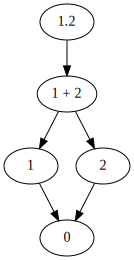

In [1]:
from graphviz import Digraph

d = Digraph()

d.edge('1.2', '1 + 2')
d.edge('1 + 2', '1')
d.edge('1 + 2', '2')
d.edge('1', '0')
d.edge('2', '0')

d

$M = 1.2$ is the saturated model, $M = 1 + 2$ is the independence model, $M = 1$ is the independence model plus $X_2 | X_1$ is uniform, $M = 2$ is the independence model plus $X_1 | X_2$ is uniform, $M = 0$ is the uniform distribution.

The lattice of trivariate models is shown in the figure below:

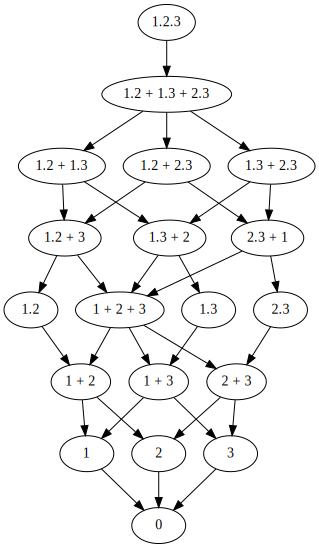

In [2]:
from graphviz import Digraph

d = Digraph()

d.edge('1.2.3', '1.2 + 1.3 + 2.3')

d.edge('1.2 + 1.3 + 2.3', '1.2 + 1.3')
d.edge('1.2 + 1.3 + 2.3', '1.2 + 2.3')
d.edge('1.2 + 1.3 + 2.3', '1.3 + 2.3')

d.edge('1.2 + 1.3', '1.2 + 3')
d.edge('1.2 + 2.3', '1.2 + 3')

d.edge('1.2 + 1.3', '1.3 + 2')
d.edge('1.3 + 2.3', '1.3 + 2')

d.edge('1.2 + 2.3', '2.3 + 1')
d.edge('1.3 + 2.3', '2.3 + 1')

d.edge('1.2 + 3', '1 + 2 + 3')
d.edge('1.3 + 2', '1 + 2 + 3')
d.edge('2.3 + 1', '1 + 2 + 3')

d.edge('1.2 + 3', '1.2')
d.edge('1.3 + 2', '1.3')
d.edge('2.3 + 1', '2.3')

d.edge('1.2', '1 + 2')
d.edge('1.3', '1 + 3')
d.edge('2.3', '2 + 3')

d.edge('1 + 2 + 3', '1 + 2')
d.edge('1 + 2 + 3', '1 + 3')
d.edge('1 + 2 + 3', '2 + 3')

d.edge('1 + 2', '1')
d.edge('1 + 2', '2')
d.edge('1 + 3', '1')
d.edge('1 + 3', '3')
d.edge('2 + 3', '2')
d.edge('2 + 3', '3')

d.edge('1', '0')
d.edge('2', '0')
d.edge('3', '0')

d

### 18.6 Fitting Log-Linear Models to Data

Let $\beta$ denote all the parameters in a log-linear model $M$.  The log-likelihood for $\beta$ is:

$$ \ell(\beta) = \sum_j x_j \log p_j(\beta) $$

where the sum is over the cells and $p(\beta)$ denotes the cell probabilities corresponding to $\beta$.  The MLE $\hat{\beta}$ generally has to be found numerically.  The model with all possible $\psi$-terms is called the  **saturated models**.  We can also fit any **sub-model** which corresponds to setting some subset of $\psi$ terms to 0.

For any submodel $M$, define the **deviance** $\text{dev}(M)$ by

$$ \text{dev}(M) = 2 (\hat{\ell}_\text{sat} - \hat{\ell}_M) $$

where $\ell_\text{sat}$ is the log-likelihood of the saturated model evaluated at the MLE and $\hat{\ell}_M$ is the log-likelihood of the model $M$ evaluated at its MLE.

**Theorem 18.14**.  The deviance is the likelihood test statistic for

$$
H_0 : \text{the model is } M
\quad \text{versus} \quad
H_1 : \text{the model is not } M
$$

Under $H_0$, $\text{dev}(M) \leadsto \chi^2_\nu$ with $\nu$ degrees of freedom equal to the difference in the number of parameters between the saturated model and $M$.

One way to find a good model is to use the deviance to test every sub-model.  Every model that is not rejected by this test is then considered a plausible model.  However, this is not a good strategy for two reasons.  First, we will end up doing many tests, which means there is ample opportunity for making Type I and Type II errors.  Second, we will end up using models where we failed to reject $H_0$.  But we might fail to reject $H_0$ due to low power.  The result is that we end up with a bad model just due to low power.

There are many model searching strategies.  A common approach is to use some form of *penalized likelihood*.  One version of penalized is the AIC that we used in regression.  For any model $M$ define

$$ \text{AIC}(M) = -2 \left( \hat{\ell}(M) - |M|\right) $$

where $|M|$ is the number of parameters.

Consider a set of models $\{ M_1, M_2, \dots \}$.  Let $\hat{f}_j(x)$ denote the estimated probability function obtained by using the maximum likelihood estimator of model $M_j$.  Thus, $\hat{f}_j(x) = \hat{f}(x; \hat{\beta}_j)$ where $\hat{\beta}_j$ is the MLE of the set of parameters $\beta_j$ for model $M_j$.  We will use the loss function $D(f, \hat{f})$ where

$$ D(f, g) = \sum_x f(x) \log \frac{f(x)}{g(x)} $$

is the Kullback-Leibler divergence between two probability density functions.  The corresponding risk function is $R(f, \hat{f}) = \mathbb{E}(D(f, \hat{f}))$.

Notice that $D(f, \hat{f})  = c - A(f, \hat{f})$ where $c = \sum_x f(x) \log f(x)$ does not depend on $\hat{f}$ and 

$$ A(f, \hat{f}) = \sum_x f(x) \log \hat{f}(x) $$

Thus minimizing the risk is equivalent to minimizing $a(f, \hat{f}) = \mathbb{E}(A(f, \hat{f}))$.

It is tempting to estimate $a(f, \hat{f})$ by $\sum_x \log \hat{f}(x)$ but, just as the training error in regression is highly biased estimate of prediction risk, it is also the case that $\sum_x \log \hat{f}(x)$ is a highly biased estimate of $a(f, \hat{f})$.  In fact, the bias is approximately equal to $|M_j|$.  Thus:

**Theorem 18.15**.  $\text{AIC}(M_j)$ is an approximately unbiased estimate of $a(f, \hat{f})$.

After finding a "best model" this way we can draw the corresponding graph.  We can also check the overall fit of the selected model using the deviance as described above.

### 18.8 Exercises

**Exercise 18.8.1**.  Solve for the $p_{ij}$'s in terms of the $\beta$'s in Example 18.3:

*Example*: Let $X = (X_1, X_2)$ where $X_1 \in \{0, 1\}$ and $X_2 \in \{ 0, 1, 2 \}$.  The joint distribution of $n$ such random vectors is a multinomial with 6 categories.  The multinomial parameters can be written as a 2-by-3 table as follows:

$$
\begin{array}{ccccc}
\hline
\text{multinomial} & x_2 & 0 & 1 & 2 \\
\hline
x_1 & 0 & p_{00} & p_{01} & p_{02} \\
    & 1 & p_{10} & p_{11} & p_{12} \\
\hline
\end{array}
$$

The $n$ data vectors can be summarized as follows:

$$
\begin{array}{ccccc}
\hline
\text{multinomial} & x_2 & 0 & 1 & 2 \\
\hline
x_1 & 0 & C_{00} & C_{01} & C_{02} \\
    & 1 & C_{10} & C_{11} & C_{12} \\
\hline
\end{array}
$$

For $x = (x_1, x_2)$, the log-linear expansion takes the form

$$ \log f(x) = \psi_\varnothing(x) + \psi_1(x) + \psi_2(x) + \psi_{12}(x) $$

where

$$
\begin{align}
& \psi_\varnothing(x) = \log p_{00} \\
& \psi_1(x) = x_1 \log \left( \frac{p_{10}}{p_{00}} \right) \\
& \psi_2(x) = I(x_2 = 1) \log \left( \frac{p_{01}}{p_{00}} \right) 
            + I(x_2 = 2) \log \left( \frac{p_{02}}{p_{00}} \right) \\
& \psi_{12}(x) = I(x_1 = 1, x_2 = 1) \log \left( \frac{p_{11}p_{00}}{p_{01}p_{10}} \right)
               + I(x_1 = 1, x_2 = 2) \log \left( \frac{p_{12}p_{00}}{p_{02}p_{10}} \right)
\end{align}
$$

The six parameters of this model are:

$$
\begin{array}{ccc}
\beta_1 = \log p_{00} &
\beta_2 = \log \left( \frac{p_{10}}{p_{00}} \right) &
\beta_3 = \log \left( \frac{p_{01}}{p_{00}} \right) \\
\beta_4 = \log \left( \frac{p_{02}}{p_{00}} \right) &
\beta_5 = \log \left( \frac{p_{11}p_{00}}{p_{01}p_{10}} \right) &
\beta_6 = \log \left( \frac{p_{12}p_{00}}{p_{02}p_{10}} \right)
\end{array}
$$

**Solution**.

Exponentiate the six definitions for $\beta_k$ above and get:

$$
\begin{array}{ccc}
p_{00} = \exp \beta_1 &
\frac{p_{10}}{p_{00}} = \exp \beta_2 &
\frac{p_{01}}{p_{00}} = \exp \beta_3 \\
\frac{p_{02}}{p_{00}} = \exp \beta_4 &
\frac{p_{11}p_{00}}{p_{01}p_{10}} = \exp \beta_5 &
\frac{p_{12}p_{00}}{p_{02}p_{10}} = \exp \beta_6
\end{array}
$$

and then, isolating the $p_{ij}$s,

$$
\begin{array}{ccc}
p_{00} = \exp \beta_1 &
p_{10} = \exp \left( \beta_1 + \beta_2 \right) &
p_{01} = \exp \left( \beta_1 + \beta_3 \right) \\
p_{02} = \exp \left( \beta_1 + \beta_4 \right) &
p_{11} = \exp \left( \beta_1 + \beta_2 + \beta_3 + \beta_5 \right) &
p_{12} = \exp \left( \beta_1 + \beta_2 + \beta_4 + \beta_6 \right)
\end{array}
$$

**Exercise 18.8.2**. Repeat example 18.17 using 7 covariates and $n = 1000$. To avoid numerical problems, replace any zero count with a one.

*Example*: Here is a synthetic example.  We generate $n = 100$ random vectors $X = (X_1, \dots, X_5)$ of length 5.  We generated the data as follows:

$$ X_1 \sim \text{Bernoulli}(1/2)$$

and

$$ X_j | X_1, \dots, X_{j-1} = \begin{cases}
1/4 & \text{if } X_{j-1} = 0 \\
3/4 & \text{if } X_{j-1} = 1
\end{cases}$$

It follows that

$$
\begin{align}
f(x_1, \dots, x_5) &= 
\left( \frac{1}{2} \right) \left( \frac{3}{4} \right)^{x_1} \left( \frac{1}{4} \right)^{1 - x_1} \left( \frac{3}{4} \right)^{x_2} \left( \frac{1}{4} \right)^{1 - x_2} \left( \frac{3}{4} \right)^{x_3} \left( \frac{1}{4} \right)^{1 - x_3} \left( \frac{3}{4} \right)^{x_4} \left( \frac{1}{4} \right)^{1 - x_4} \\
&= \left( \frac{1}{2} \right) \left( \frac{3}{4} \right)^{x_1 + x_2 + x_3 + x_4} \left( \frac{1}{4} \right)^{4 - (x_1 + x_2 + x_3 + x_4)} 
\end{align}
$$

We estimated $f$ using three methods: (i)  maximum likelihood treating this as a multinomial with 32 categories (ii) maximum likelihood from the best loglinear model using AIC and forward selection and (iii) maximum likelihood from the best loglinear model using BIC and forward selection. We estimated the risk by simulating the sample 100 times.  The average risks were:

| Method | Risk |
|--------|------|
| MLE    | 0.63 |
| AIC    | 0.54 |
| BIC    | 0.53 |

In this example, there is little difference between AIC and BIC.  Both are better than maximum likelihood.

**Solution**.

Let's generate $n = 1000$ random vectors $X = (X_1, \dots, X_k)$ of length $k = 7$ as follows:

$$ X_1 \sim \text{Bernoulli}(1/2) 
\quad \text{and} \quad
X_j | X_1, \dots, X_{j-1} = \begin{cases}
1/4 & \text{if } X_{j-1} = 0 \\
3/4 & \text{if } X_{j-1} = 1
\end{cases}
$$

It follows that

$$ f(x) = \frac{1}{2} \left( \frac{3}{4} \right)^{\sum_{i=1}^{k - 1} x_i} \left( \frac{1}{4} \right)^{(k - 1) - \left(\sum_{i=1}^{k - 1} x_i \right)} $$

We will use the KL divergence as our loss function:

$$ D(f, g) = \sum_{x \in \Omega} f(x) \log \frac{f(x)}{g(x)} $$

and estimate the risk function $R(f, \hat{f}) = \mathbb{E}[D(f, \hat{f})]$ by bootstraping the estimation process and calculating the average of the loss functions in each bootstrap step.

#### MLE estimate

The MLE estimate for the full multinomial model is relatively simple: consider the adjusted counts $\tilde{C}_{\xi}$ to be the number of times an observation $\xi$ appears, or 1 if that number of observations is 0.  There are $2^k = 128$ possible observations, so we get $2^k$ adjusted counts $\tilde{C}_1, \dots, \tilde{C}_{2^k}$.  The MLE estimate is then computed as $\hat{p} = (\hat{p}_1, \dots, \hat{p}_{2^k})$, with $\hat{p}_i = \frac{\tilde{C}_i}{\sum_\xi \tilde{C}_\xi}$.

The function density estimate corresponding to the MLE estimate is a simple lookup table $\hat{f}(\xi) = \hat{p}_\xi$, as we already have a probability estimate associated with every single possible event.  The function density estimate can then be used to compute the loss function $D(f, \hat{f})$, which is the KL divergence computed over the universe.   Repeating this process gives us the risk estimate.

In [3]:
import numpy as np
from itertools import chain, combinations
from tqdm import tqdm_notebook


# Recipe from itertools documentation, https://docs.python.org/2.7/library/itertools.html#recipes
def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))


def generate_samples(n, k):
    """
    Generates n samples of size k according to the synthetic distribution
    
    Args:
       n:  number of samples
       k:  sample size
       
    Returns:
       X:  2D array of shape (n, k), representing n samples of size k
    """
    
    # Generate a random unifom value between 0 and 1 for each variable in each sample
    random_seeds = np.random.uniform(low=0, high=1, size=(k, n))
    
    # Create a variable to store the generated samples
    output = np.empty_like(random_seeds).astype(int)
    
    # Generate x_1's as Bernoulli(1/2)
    output[0] = random_seeds[0] > 0.5
    for j in range(1, k):
        # Generate x_j's recursively
        output[j] = random_seeds[j] > (output[j - 1] == 0) * (1/4) + (output[j - 1] == 1) * (3/4)
        
    return output.T


def generate_universe(k):
    """
    Generates 2**k samples of size k iterating through the valid universe
    
    Args:
       k: sample size
       
    Returns:
       X_universe:  2D array of shape (2**k, k), representing the universe of all samples of size k
    """
    X_universe = np.zeros(shape=(2**k, k), dtype=int)
    for i, line in enumerate(powerset(range(k))):
        X_universe[i, line] = 1
        
    return X_universe


def row_to_binary(x):
    """
    Translates a single row into a binary low-endian representation
    
    Args:
       x:  1D array of 0s and 1s
       
    Returns:
       sum(x[i] * (2**i) for index i)
    """
    
    # Translate a row of 0s and 1s into a binary representation (low-endian)
    return sum([x[i] * (2**i) for i in range(len(x))])


def samples_to_count(X):
    """
    Counts the number of occurrences of each sample in the dataset
    
    Args:
       X:   2D array  n samples of size k
       
    Returns:
       count:  1D array of size 2**k, where count[i] is the number of
               occurrences of i as a row in binary (low-endian) in X,
               or 1 if the count would be 0.
    """
    
    binary_samples = np.apply_along_axis(row_to_binary, 1, X)
    k = X.shape[1]
    count = np.zeros(2**k)
    for sample in binary_samples:
        count[sample] += 1
    
    # Replace all zeroes with ones
    return np.where(count == 0, 1, count)


def true_density(x):
    """
    True density function for the synthetic distribution.
    
    Args:
       x:  1D array  sample
       
    Returns:
       value of PDF = (1/2) * (3/4)**(sum(x)) * (1/4)**(len(x) - sum(x))
    """
    
    s = sum(x)
    k = len(x)
    return (1/2) * ((3/4)**s) * ((1/4)**(k - s))


def KL_divergence(f, g, X):
    """
    Returns the KL divergence between f and g calculated on universe X
    
    Args:
       f:  1D array => double  probability density function
       g:  1D array => double  probability density function
       X:  2D array (n, k) of n samples of size k
       
    Returns:  D(f, g) = sum over samples of f(x) * log(f(x) / g(x))
    """
    
    def term(x):
        """ 
        Return f(x) * log(f(x) / g(x)) 
        
        Args:
           x:  1D array sample of values
        """
        fx = f(x)
        gx = g(x)
        return fx * np.log(fx / gx)
    
    return sum(np.apply_along_axis(term, 1, X))

In [4]:
# We can now calculate the expected value of the loss function by simulation

def p_hat_mle(X):
    """ MLE estimate for the multinomial (replacing zeros with ones) """
    count = samples_to_count(X)
    return count / sum(count)


def f_hat_mle(p_hat_mle):
    """ Density function for the estimated multinomial """
    return lambda x : p_hat_mle[row_to_binary(x)]

In [5]:
# Wrapper for parallel processing on progress bars
# Source: https://stackoverflow.com/a/58936697

import contextlib
import joblib
from joblib import Parallel, delayed

@contextlib.contextmanager
def tqdm_joblib(tqdm_object):
    """Context manager to patch joblib to report into tqdm progress bar given as argument"""
    class TqdmBatchCompletionCallback:
        def __init__(self, time, index, parallel):
            self.index = index
            self.parallel = parallel

        def __call__(self, index):
            tqdm_object.update()
            if self.parallel._original_iterator is not None:
                self.parallel.dispatch_next()

    old_batch_callback = joblib.parallel.BatchCompletionCallBack
    joblib.parallel.BatchCompletionCallBack = TqdmBatchCompletionCallback
    try:
        yield tqdm_object
    finally:
        joblib.parallel.BatchCompletionCallBack = old_batch_callback
        tqdm_object.close()  

In [9]:
# Bootstrap MLE
import multiprocessing

B = 10000
n = 1000
k = 7

X_universe = generate_universe(k=k)

n_jobs = max(multiprocessing.cpu_count() - 1, 1)

def bootstrap_step_mle(i):
    XX = generate_samples(n=n, k=k)
    p_hat = p_hat_mle(XX)
    f_hat = f_hat_mle(p_hat)
    return KL_divergence(true_density, f_hat, X_universe)

with tqdm_joblib(tqdm_notebook(desc="MLE", total=B)) as progress_bar:
    risk_mle = np.array(Parallel(n_jobs=n_jobs)(delayed(bootstrap_step_mle)(i) for i in range(B)))

print('MLE mean: %.2f' % risk_mle.mean())


MLE mean: 0.75


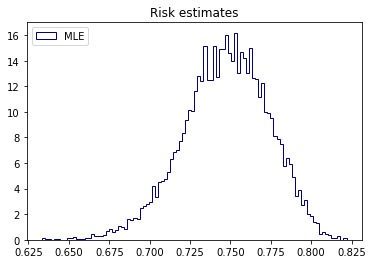

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(risk_mle, bins=100, label='MLE', density=True, histtype='step', color='darkblue')
plt.legend(loc='upper left')
plt.title('Risk estimates')
plt.show()

#### Parametrizing and fitting log-linear models

A log-linear model $M_S$ has density of the form:

$$ \log f(x) = \sum_{A \subset S} \psi_A(x) $$

where $\psi_A$ depends on $x_i$ only if $i \in A$.  Since x = $(x_1, \dots, x_k)$ has its components with values $x_i \in \{ 0, 1 \}$, we can express that as

$$ \psi_A(x) = \sum_{B \subset A} c_{B, A} g_A(x) = \sum_{B \subset A} c_{B, A} \left( \prod_{j \in B} x_j \right) $$

for some constants $c_{B, A}$, and where $g_A(x) = \prod_{j \in A} x_j$. We can then write the log-likelihood for a parameter $\beta = \left\{ \beta_A | A \subset S \right\}$ as the sum of the log density evaluated at each observation:

$$ \ell(\beta) = \sum_{x \in \text{obs}} \log f(x; \beta) =  \sum_{x \in \text{obs}} \sum_{A \subset S} \sum_{B \subset A} c_{B, A} g_A(x) = \sum_{x \in \text{obs}} \sum_{A \subset S} \beta_A g_A(x) = \sum_{A \subset S} \beta_A \sum_{x \in \text{obs}} g_A(x) $$

We will want to find the MLE $\hat{\beta}$ subject to the constraint that $f(x)$ is a probability density function which adds up to one, that is, $\sum_{x \in \Omega} f(x) = 1$ over the random variable universe $\Omega = \{ 0, 1 \}^k$.

We can now explicitly frame this as an optimization problem, with target being the maximization of the log likelihood, and a nonlinear equality constraint that the density function adds up to 1:

$$
\hat{\beta} = \text{argmax}_\beta \left\{ \sum_{A \subset S} \beta_A \sum_{x \in \text{obs}} g_A(x) 
\;\Bigg|\;  \sum_{x \in \Omega} \exp \left( \sum_{A \subset S} \beta_A g_A(x) \right) = 1
\right\}
$$

#### Matrix representation

We can use matrix multiplications to speed up the function and constraint evaluations during optimization.  If $X$ is a matrix of $n$ samples by $k$ dimensions, containing $n$ observations, we define the matrix $h_S(X)$, where

$$ (h_S(X))_{i, j} = \begin{cases}
1 & \text{if } X_{r}^j = 1 \text{ for all } r \in A \text{, where the } j \text{-th element of } X \text{ is } X^j = (X^j_1, \dots, X^j_k) \text{ and } A \text{ is the } i \text{-th subset of } S \\
0 & \text{otherwise}
\end{cases}$$

By definition, the log-likelihood then becomes the sum of the elements of the matrix product $\beta \cdot h_S(X_\text{obs})$:

$$ \ell(\beta) = \sum_{A \in S} \sum_{x \in \text{obs}} \beta_A g_A(x) = \sum_i \left( \beta \cdot h_S(X_\text{obs}) \right)_i $$

The constraint can also be computed using a matrix multiplication, first defining a matrix $X_\Omega$ of shape $(2^k, k)$ that contains one row for each possible observation:

$$ (X_\Omega)_{i, j} = \begin{cases}
1 & \text{if the } j \text{-th digit in the binary representation of } i \text{ is } 1 \\
0 & \text{otherwise}
\end{cases}$$

Then the sum of the density functions is the sum of the element-wise exponentials resulting from a matrix product $\beta \cdot h_S(X_\Omega)$:

$$ \sum_{x \in \Omega} f(x) = \sum_{x \in \Omega} \exp \left(\sum_{A \subset S} \beta_A g_A(x) \right) 
= \sum_{i} \exp \left( \beta \cdot h_S(X_\Omega) \right)_i$$

Now, after pre-computing $h_S(X_\text{obs})$ and $h_S(X_\Omega)$, an optimizer will only need to perform sums, matrix multiplications and exponentiations to compute the target function and constraint penalty at each step.

Finally, note that $\sum_{x \in \Omega} = 1$ if and only if $\log \sum_{x \in \Omega} f(x) = 0$, so we can use scipy's `logsumexp` function to represent the total probability density function constraint.

#### Model selection and bootstraping

**Model selection** is to be performed using forward selection with AIC or BIC scores.  This means that, for each observation set $X$, given a scoring process to pick between models, we will:

1. Fit the uniform model $M_\varnothing$;
2. Given the current best model $M_{S_0}$, fit all models $M_{S}$ where $S = S_0 \cup \{ i \}$ for each $i$ not in $S_0$;
3. If a new model was found as an improvement, select it as the new best model and return to step 2.  Otherwise, keep the current best model and stop.

**AIC** will be computed as the log likelihood of the candidate model at its MLE minus its number of parameters:

$$ \text{AIC}(M_S) = \hat{\ell}_S - |M_S| $$

**BIC** will be computed as the log likelihood of the candidate model at its MLE minus the BIC penalty on this formulation (half times number of parameters times log sample size):

$$ \text{BIC}(M_S) = \hat{\ell}_S - \frac{1}{2} |M_S| \log n $$

Once a model is selected, we can compute its loss $D(f, \hat{f})$, the KL divergence over the universe of observations for the fitted density function.

**Bootstraping** means repeating this process multiple times, observing the loss at each point and reporting its average and distribution.  Note that the model selection itself is a part of the bootstraping process -- different model formulations could potentially be chosen for different observations, even though they come from the same synthetic data generation process.

In [11]:
from scipy.optimize import minimize
from scipy.special import logsumexp

def get_loglinear_mle(X, subsets):
    """
    Estimates a loglinear model for observations X given variables S via maximizing the likelihood estimator.
    
    Args:
       X:  2D array, shape (n, k), of samples and observations (0 or 1)
       S:  iterable of variables between 0 and k-1 inclusive
       
    Returns:
       beta_hat:  1D array of size 2**|S| with estimated parameters via MLE
       log_likelihood:  Value of the log-likelihood of the model estimated at the MLE
    """
    k = X.shape[1]
    
    n_subsets = len(subsets)
    
    # Speed up calculation of gA operations with vector operations
    def get_h(XX):
        """
        Calculate the matrix gA(XX) of shape (2**|S|, XX.shape[0]), where
        gA(XX){i, j} = 1 if all elements of the i-th subset A of S are in the j-th sample of XX
                       0 otherwise
        """
        h = np.zeros(shape=(len(subsets), XX.shape[0]), dtype=int)
        for i, A in enumerate(subsets):
            h[i] = XX[:, A].all(axis = 1)
            
        return h
    
    h_obs = get_h(X)
    h_universe = get_h(generate_universe(k))
    
    def neg_log_likelihood(beta):
        return -np.sum(beta @ h_obs)
    
    def log_density_sum(beta):
        # Use scipy's logsumexp to avoid overflows
        # exp(sum(beta @ h_universe)) - 1 == 0 iff logsumexp(beta @ h_universe) == 0
        return logsumexp(beta @ h_universe)
    
    # Constraint: PDF adds up to 1
    pdf_constraint = {'type': 'eq', 'fun': log_density_sum}
    
    # Get initial guess: all values zero other than first
    beta0 = np.zeros(len(subsets))
    beta0[0] = -k * np.log(2)
    
    res = minimize(neg_log_likelihood, beta0, constraints=[pdf_constraint])
    beta_hat = res.x
    log_likelihood = -res.fun
    
    return beta_hat, log_likelihood


def f_loglinear(subsets, beta):
    """
    Computes the density function for a given set of variables S and corresponding parameters beta.
    
    f(x) = exp ( \sum_{A in S} \beta(A) * g_A(x) )
    """
    def f(x):
        return np.exp(np.sum([x[A].all() * beta[i] for i, A in enumerate(subsets)]))
    
    return f


def get_AIC(X, subsets):
    """ 
    Calculates AIC using the loglinear model log likelihood function.
    
    Args:
       X:        2D array (n, k), observed data for log-likelihood function
       subsets:  iterable, list of subsets for log-likelihood function
       
    Returns:
       AIC score for the given submodel:  ll - |subsets|
    """
    _, log_likelihood = get_loglinear_mle(X, subsets)
    penalty = len(subsets)
    
    return log_likelihood - penalty


def get_BIC(X, subsets):
    """ 
    Calculates BIC using the loglinear model log likelihood function.
    
    Args:
       X:        2D array (n, k), observed data for log-likelihood function
       subsets:  iterable, list of subsets for log-likelihood function
       
    Returns:
       BIC score for the given submodel:  ll - (|subsets| log n) / 2
    """
    _, log_likelihood = get_loglinear_mle(X, subsets)
    n = X.shape[0]
    penalty = len(subsets) * np.log(n) / 2
    
    return log_likelihood - penalty

In [12]:
def forward_selection(score_func, S):
    """
    Uses forward selection to select a subset A of S, in a search to maximize score_func(A).

    Args:
       score_func:  (A) => score, a function to score subsets
       S:           iterable to select a subset from
       
    Returns:
       A:           a subset of S resulting from forward selection
       
    """
    all_subsets = [list(s) for s in powerset(S)]
    current_subset = [[]]
    current_score = score_func(current_subset)
    
    while True:
        best_subset, best_score = current_subset, current_score
        improved = False
        for s in all_subsets:
            if s not in current_subset:
                candidate_subset = current_subset.copy()
                candidate_subset.append(s)
                candidate_subset.sort()
                candidate_score = score_func(candidate_subset)
                
                if candidate_score > best_score:
                    improved = True
                    best_subset, best_score = candidate_subset, candidate_score
        
        if not improved:
            break
        current_subset, current_score = best_subset, best_score
    
    return current_subset

In [13]:
# AIC bootstrapping

B = 10

n = 1000
k = 7

S_full = [i for i in range(k)]
X_universe = generate_universe(k=k)

n_jobs = max(multiprocessing.cpu_count() - 1, 1)

def bootstrap_step_aic(i):
    XX = generate_samples(n=n, k=k)    
    score_func = lambda S: get_AIC(XX, S)
    best_subset = forward_selection(score_func, S_full)
    beta_hat, _ = get_loglinear_mle(XX, best_subset)
    f_hat = f_loglinear(best_subset, beta_hat)
    return KL_divergence(true_density, f_hat, X_universe)

with tqdm_joblib(tqdm_notebook(desc="AIC", total=B)) as progress_bar:
    risk_aic = np.array(Parallel(n_jobs=n_jobs)(delayed(bootstrap_step_aic)(i) for i in range(B)))

print('AIC mean: %.2f' % risk_aic.mean())


AIC mean: 1.89


In [14]:
# BIC bootstrapping

B = 10

n = 1000
k = 7

S_full = [i for i in range(k)]
X_universe = generate_universe(k=k)

n_jobs = max(multiprocessing.cpu_count() - 1, 1)

def bootstrap_step_bic(i):
    XX = generate_samples(n=n, k=k)    
    score_func = lambda S: get_BIC(XX, S)
    best_subset = forward_selection(score_func, S_full)
    beta_hat, _ = get_loglinear_mle(XX, best_subset)
    f_hat = f_loglinear(best_subset, beta_hat)
    return KL_divergence(true_density, f_hat, X_universe)

with tqdm_joblib(tqdm_notebook(desc="BIC", total=B)) as progress_bar:
    risk_bic = np.array(Parallel(n_jobs=n_jobs)(delayed(bootstrap_step_bic)(i) for i in range(B)))

print('BIC mean: %.2f' % risk_bic.mean())


BIC mean: 1.27


In [15]:
print('MLE mean: %.2f' % risk_mle.mean())
print('AIC mean: %.2f' % risk_aic.mean())
print('BIC mean: %.2f' % risk_bic.mean())

MLE mean: 0.75
AIC mean: 1.89
BIC mean: 1.27


In this scenario, the better risk is obtained by the MLE, followed by the BIC and the AIC.

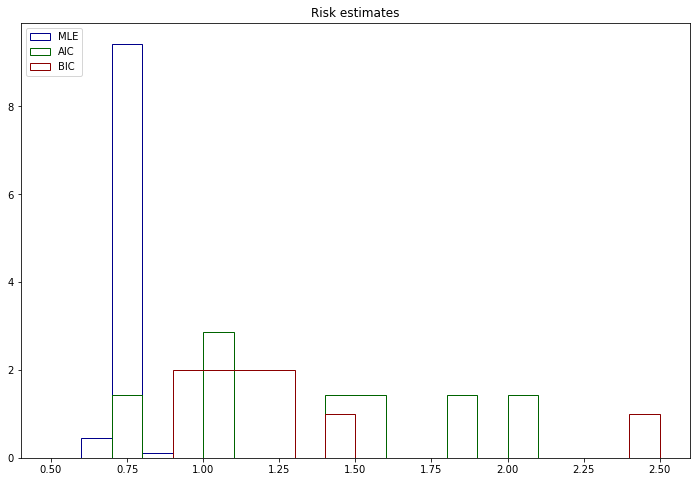

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

r = (0.5, 2.5)
plt.figure(figsize=(12, 8))
plt.hist(risk_mle, bins=20, range=r, label='MLE', density=True, histtype='step', color='darkblue')
plt.hist(risk_aic, bins=20, range=r, label='AIC', density=True, histtype='step', color='darkgreen')
plt.hist(risk_bic, bins=20, range=r, label='BIC', density=True, histtype='step', color='darkred')
plt.legend(loc='upper left')
plt.title('Risk estimates')
plt.show()